## 1) Business Problem


The dataset contains Netflix data. From the client explanation, they suspect that the average movie length is decreasing. As proof, they've given us the average movie durations from 2011 to 2020, which are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90 minutes, respectively.

The client wants to know what is behind these decreasing duration trends. So I need to find out why the netflix average movie length is decreasing with the EDA technique. I will bring you through all the analysis process that I have done for this project.

## 2) Proving the Decreasement of Movie Length

At first, the client only share the summary data about average movie length that I have mentioned in the ‘Business Problem’ section.

As the adage say, "A picture is worth a thousand words", I want to create the visualization of the Movie Length from 2011 to 2020 so I can understand the message behind it easier. To create the visualization, I did these steps:

### 1. Create Dictionary

To examine netflix average movie duration’s data, it would be smart to start working with pandas. However, before I can do that, I need to create a DataFrame from scratch. I will begin by crafting a dictionary.

In [1]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,  90]

# Create a dictionary with the two lists
movie_dict = {'movie_year' : years, 'duration' : durations}

# Print the dictionary
print(movie_dict)

{'movie_year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'duration': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


### 2. Create DataFrame

Next step, in order to transform the dictionary, movie_dict, into a pandas DataFrame, first, I need to import the pandas library. It's also important to examine the DataFrame to confirm it was constructed properly.

In [2]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   movie_year  duration
0        2011       103
1        2012       101
2        2013        99
3        2014       100
4        2015       100
5        2016        95
6        2017        95
7        2018        96
8        2019        93
9        2020        90


### 3. Create Data Visualization

The  pandas DataFrame has been created. Now, let's return to the main objective: investigate the client’s claim that the durations of movies are decreasing over time with data visualization.
Considering that the data is continuous, a line plot seems to be an appropriate choice, with the movie’s ‘Release Years’ displayed on the x-axis and the ‘Movie’s Average Durations’ (in minutes) on the y-axis. This will enable us to easily identify any trends in movie lengths. I use matplotlib.pyplot package to visualize the data, because it was one of the most widely used packages for this purpose.

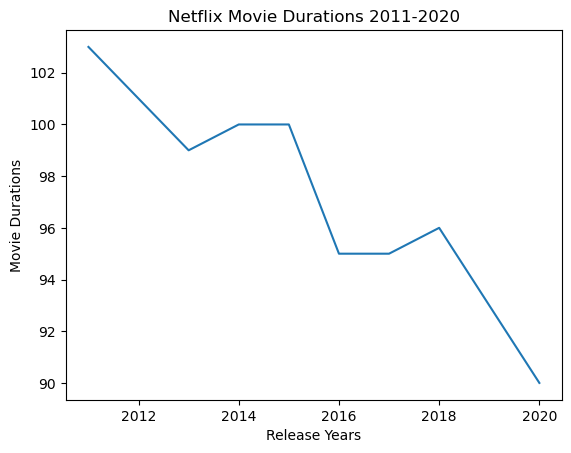

In [3]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt

fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
xtitle = "Release Years"
ytitle = "Movie Durations"
maintitle = "Netflix Movie Durations 2011-2020"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

From the data visualization above, overall, it’s true that movie durations have been decreasing over the last decade! However, it is quite difficult to conduct further analysis if I only depend on the summary data from the client. There are several questions about this trend that I can't answer at the moment, including:
- How does this trend appear over a more extended time frame?
- Is there any factor that drives this trend such as movie’s genre?

## 4) Loading the Data from CSV File

After I send the data visualization and the questions, then the client gave me the original dataset in CSV format,   named "netflix_data.csv".  Let's construct another DataFrame, this time encompassing all the data. Considering the size of the dataset, printing the entire DataFrame may not be practical, so I’ll examine it by printing just the first ten rows.

In [14]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df[0:10])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Bi

## 5) Filtering the Data

Great! The data is there. Now I can start analyzing movie durations with further analysis.
There are several column that tell netflix movie information. A quick scan on the DataFrame, there is a column labeled ‘type’ and the dataset also includes TV shows. Also, the 'duration' column has different units depending on the ‘type’ column. Maybe the ‘duration’ column units were: minutes (for movie) and seasons (for TV Show).


I need to filter the data by keeping the rows where the ‘type’ column is ‘Movie’. And also to be more efficient, I’ll create a new DataFrame named ‘netflix_movies’ that contains only 'title', 'country', 'genre', 'release_year', and 'duration'.

In [11]:
# Subset the DataFrame for type "Movie"
netflix_df.loc[[0,1,2,3,4], "type"]
netflix_df_movies_only = netflix_df["type"] == "Movie"
movie_only = netflix_df[netflix_df_movies_only]

# Select only the columns of interest
#netflix_movies_col_subset = ...
netflix_movies = movie_only.loc[:, ["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


## 6) Creating a scatter plot

I have imported the raw data, filtering the data, and trimmed the DataFrame to include only the needed columns. Next step, I need to visualize the data again to observe trends over a more extended period.
This time around, I’m dealing with individual movies data instead of aggregate data. A line plot won't be suitable for current data set, so I choose a scatter plot instead. I'll continue with the year of release on the x-axis and movie duration on the y-axis.

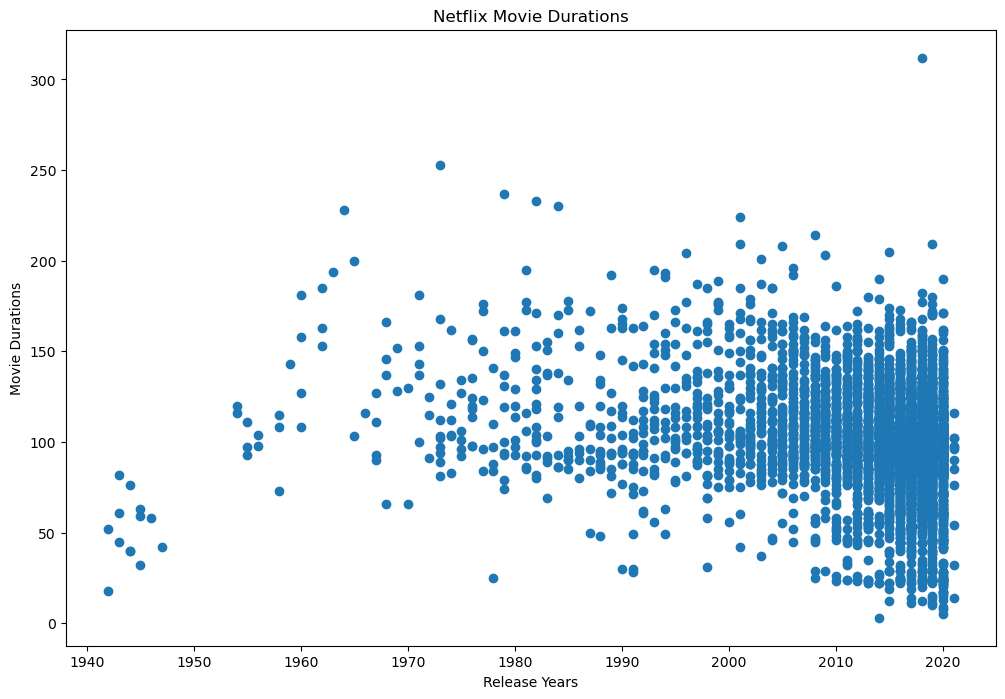

In [6]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
movie_release_year = movie_only.loc[:, ["release_year"]]
movie_duration = movie_only.loc[:, ["duration"]]
plt.scatter(movie_release_year, movie_duration)

# Create a title
xtitle = "Release Years"
ytitle = "Movie Durations"
maintitle = "Netflix Movie Durations"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

## 7) Dig Deeper

Here comes the interesting thing. Through this visualization, I can gain more insights compared to the initial plot.

Some of the insights were:
- It’s quite clear there are more movies released after 2000 compared to before 2000,
- In 2000 - 2020 period, especially in the last ten years, the shorter movie duration (less than 60 minutes) trends starting to appear,
- What factors are behind this trend? Let’s find out.

Next step, I want to know more about the movies which the duration are less than 60 minutes. So I need to filter the DataFrame to include only movies with a duration less than 60 minutes and examine their genres. This could potentially give me insights into what's decreasing the average duration.


In [7]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies["duration"] < 60
# Print the first 20 rows of short_movies
df_short_movies = netflix_movies[short_movies]
print(df_short_movies[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

## 8) Marking non-feature films

Interesting! I found another trend. The movies that less than 60 minutes mostly are grouped to a few genres such as "Children", "Stand-Up", and "Documentaries". It is make sense, as these types of movies are typically have less duration compared to Hollywood blockbuster movies.

To make it more attractive, instead of remove these rows from the data set, I would mark them with a different colour, so I can explore the impact of these genres on the data set.

I choose loops to generate a list of colors based on the 'genre' column, then I would pass this list to the plotting function in a later step to color all non-typical genres differently!

In [8]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies.iterrows() :
    if row['genre'] == "Documentaries":
        colors.append("red")
    elif row['genre'] == "Children":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append ("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(netflix_movies[0:10])

    title        country          genre  release_year  duration
1    7:19         Mexico         Dramas          2016        93
2   23:59      Singapore  Horror Movies          2011        78
3       9  United States         Action          2009        80
4      21  United States         Dramas          2008       123
6     122          Egypt  Horror Movies          2019        95
7     187  United States         Dramas          1997       119
8     706          India  Horror Movies          2019       118
9    1920          India  Horror Movies          2008       143
10   1922  United States         Dramas          2017       103
13  2,215       Thailand  Documentaries          2018        89


## 9) Plotting with color

With the ‘colors’ list, now I will be able to visually assess whether these genres could be the reason behind the movie duration decreasement trend.

This time, I’m also enhance the plot with additional axis labels and a fresh theme using plt.style.use().

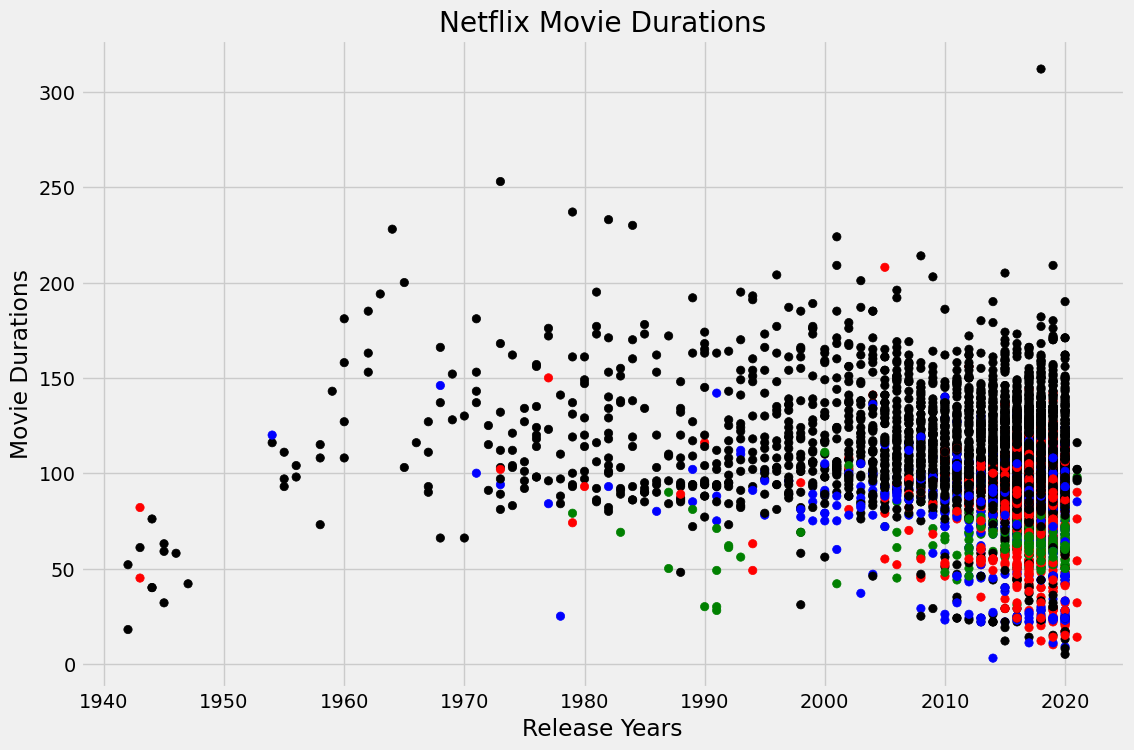

In [9]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
movie_release_year = movie_only.loc[:, ["release_year"]]
movie_duration = movie_only.loc[:, ["duration"]]
plt.scatter(movie_release_year, movie_duration, color = colors)

# Create a title and axis labels
xtitle = "Release Years"
ytitle = "Movie Durations"
maintitle = "Netflix Movie Durations"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

## 10) EDA Conclusion


Finally, I have done the EDA Analysis.  As I hypothesized, non-typical genres like children's movies and documentaries are clustered towards the lower half of the plot. It means these genres has an impact on  Netflix Movie duration decreasement trend in 2000-2020 period. However, we can't draw definitive conclusions until we conduct further analysis.

EDA Conclusion:
- Movies genres have potentially significant impact to Netflix Movie duration decreasement trend in 2000-2020 period.
- Further analysis is needed to draw definitive conclusions.